# BLN Wajith Ali

In [51]:
# importing the required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [2]:
# loading the dataset
df = pd.read_csv("E:\Coding notebook/intern/week3/Data_analysis/netflix_titles.csv")

In [3]:
#printing the data columns with the number of rows and
print(f'The DataSet has {df.shape[1]} columns with the headings of {df.columns} and contains {df.shape[0]} rows')

The DataSet has 12 columns with the headings of Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object') and contains 8807 rows


# Data Cleaning & Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
pd.isnull(df).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
2       False  False  False     False  False     True       False   
3       False  False  False      True   True     True       False   
4       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8802    False  False  False     False  False    False       False   
8803    False  False  False      True   True     True       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      Fals

In [9]:
df.dropna(inplace=True)


In [10]:
df.shape

(5332, 12)

In [11]:
df.rename(columns= {'listed_in':'genre'}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  genre         5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [13]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


# EDA - Exploratory Data Analysis

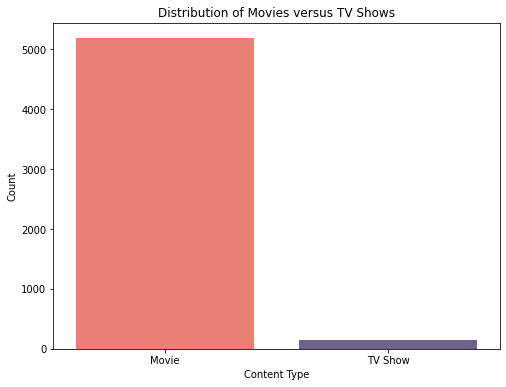

In [63]:
# Visualizing Content Types Distribution
custom_palt = ["#FF6F61", "#6B5B95"]
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette=custom_palt)
plt.title('Distribution of Movies versus TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

In [58]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)
print("Data type of 'duration' column post-transformation:", movies_df['duration'].dtype)

Data type of 'duration' column post-transformation: int32


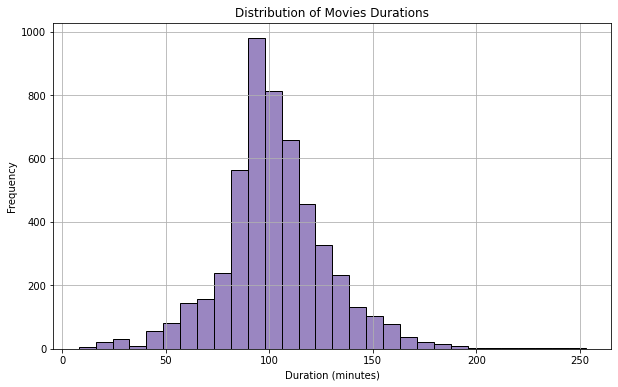

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration'], bins=30, color='#795eac', edgecolor='black')
plt.title('Distribution of Movies Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

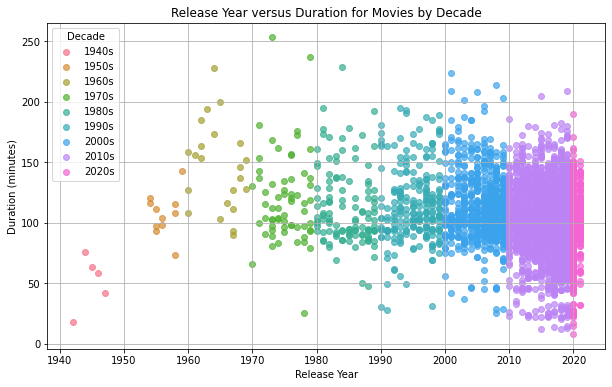

In [64]:
# Creating a new column for dividing years into decades
movies_df['decade'] = (movies_df['release_year'] // 10) * 10

color_palt = sns.color_palette('husl', n_colors=len(movies_df['decade'].unique()))
plt.figure(figsize=(10, 6))
for i, decade in enumerate(sorted(movies_df['decade'].unique())):
    subset = movies_df[movies_df['decade'] == decade]
    plt.scatter(subset['release_year'], subset['duration'], label=str(decade)+'s', color=color_palt[i], alpha=0.7)
plt.title('Release Year versus Duration for Movies by Decade')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend(title='Decade')
plt.grid(True)
plt.show()


In [60]:
# finding movie with the max and min duration
min_duration = movies_df.loc[movies_df['duration'].idxmin()]
max_duration = movies_df.loc[movies_df['duration'].idxmax()]

print("Movie with the min duration:")
print(min_duration[['title', 'release_year', 'duration']])
print("\nMovie with the max duration:")
print(max_duration[['title', 'release_year', 'duration']])

Movie with the min duration:
title           Cops and Robbers
release_year                2020
duration                       8
Name: 1484, dtype: object

Movie with the max duration:
title           The School of Mischief
release_year                      1973
duration                           253
Name: 2491, dtype: object


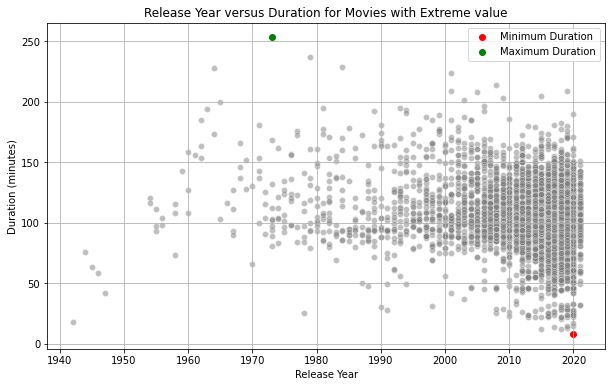

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='release_year', y='duration', color='grey', alpha=0.5)
plt.scatter(min_duration['release_year'], min_duration['duration'], color='red', label='Mini Duration')
plt.scatter(max_duration['release_year'], max_duration['duration'], color='green', label='Maxi Duration')
plt.title('Release Year versus Duration for Movies with Extreme value')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend()
plt.grid(True)
plt.show()

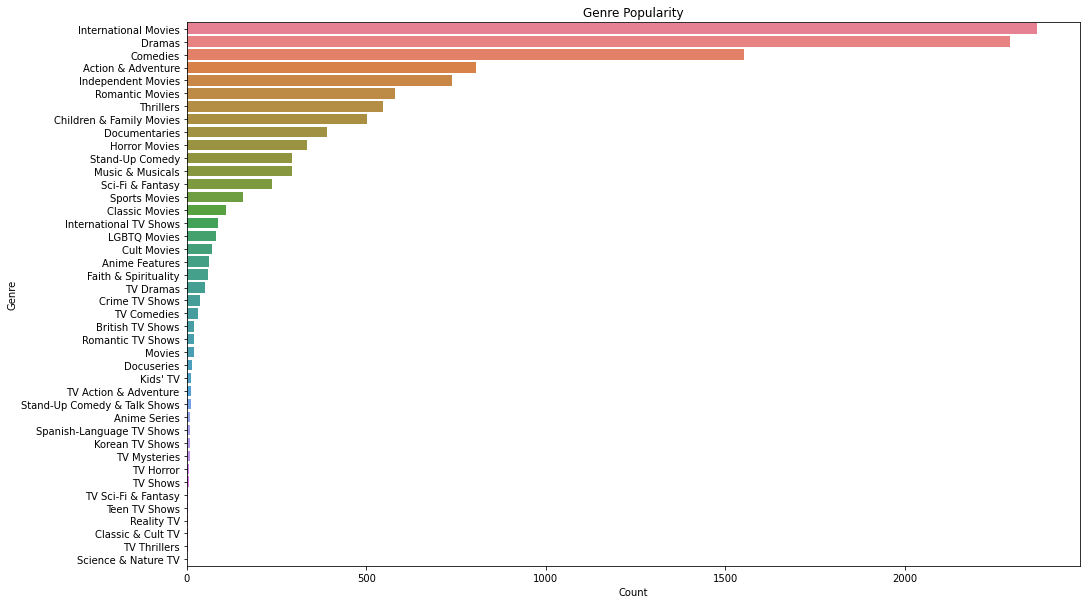

In [62]:
# Count the occurrences of each genre across the dataset
unique_genres = df['genre'].str.split(', ').explode().unique()
genre_counts = df['genre'].str.split(', ').explode().value_counts()
colors = sns.color_palette('husl', n_colors=len(unique_genres))
plt.figure(figsize=(16, 10))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=colors)
plt.title('Genre Popularity')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# IDA - Initial Data Analysis

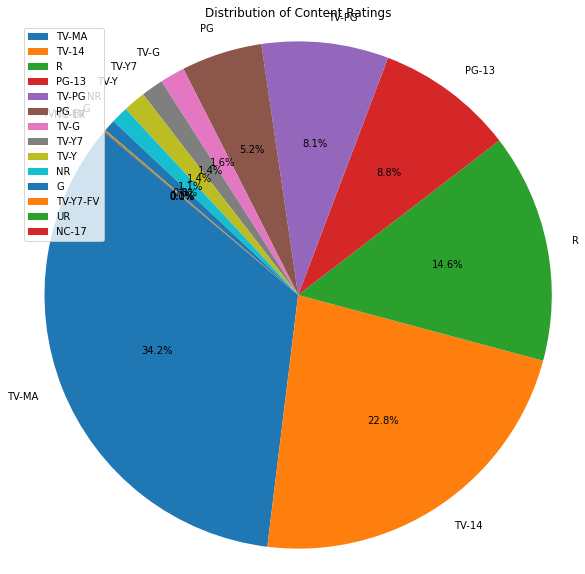

In [35]:
# The quoted question is generated via AI generated 
"""As a content manager at a streaming platform, why is it important to understand the distribution of content ratings, and how does this knowledge impact content strategy decisions?"""

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10, 10), facecolor='white')
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Ratings')
plt.axis('equal')  
plt.legend(loc="best")
plt.show()

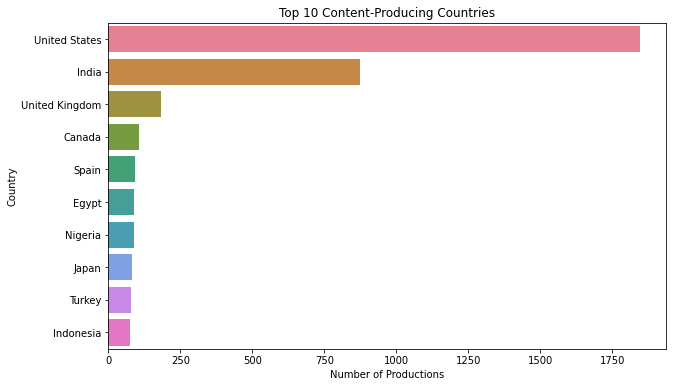

In [36]:
# The quoted question is generated via AI generated
""""How does identifying the top content-producing countries benefit a streaming platform's content manager in terms of strategic planning and audience engagement?"""
# Identify the top 10 content-producing countries
top_countries = df['country'].value_counts().head(10)

colors = sns.color_palette('husl', n_colors=len(top_countries))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Productions')
plt.ylabel('Country')
plt.show()


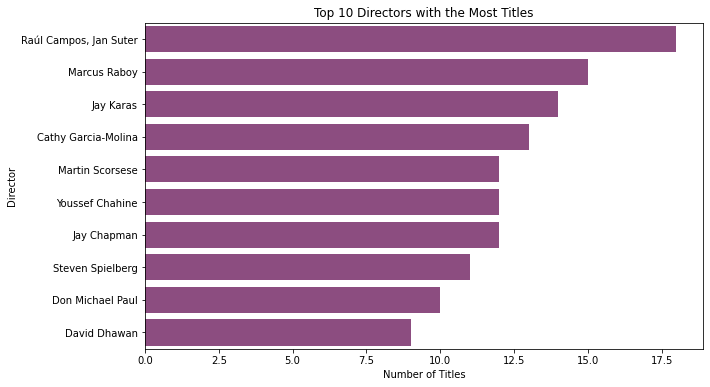

In [43]:
# The quoted question is generated via AI generated
"""How does recognizing the directors who have contributed the most titles to a streaming platform benefit the content manager in terms of talent partnerships, collaboration opportunities, and user recommendations?"""
# Find the top 10 directors based on the number of titles
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, color='#974287')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# Text Analysis

In [50]:
# The quoted question is generated via AI generated
"""How does extracting common keywords or phrases from content descriptions benefit a streaming platform's content manager in terms of understanding audience preferences, enhancing content tagging and recommendation algorithms, and optimizing marketing campaigns?"""
# The below has been adapted from previous projects with sources from " Stack OverFlow "
vect = CountVectorizer(stop_words = 'english', max_features=100)
feature_description = vect.fit_transform(df['genre'])
feature_name = vect.get_feature_names_out()
feature_count = feature_description.sum(axis=0)
indices = feature_count.argsort()[0,-10:]
keywords = [feature_name[idx] for idx in indices]
print("Top 10 genres are: ")
for keyword in keywords:
    print(keyword)

Top 10 genres are: 
[['children' 'thrillers' 'romantic' 'independent' 'adventure' 'action'
  'comedies' 'dramas' 'international' 'movies']]


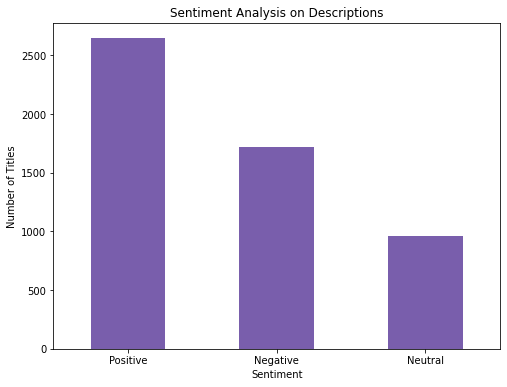

In [70]:
# The quoted question is generated via AI generated
"""How does analyzing the sentiment of movie and TV show descriptions benefit a streaming platform's content manager in understanding audience perception and optimizing marketing strategies?"""
# The below has been adapted from previous projects with sources from " Stack OverFlow "
tone = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
tone_cat = [ 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral' for score in tone]
tone_counts = pd.Series(tone_cat).value_counts()

plt.figure(figsize=(8, 6))
tone_counts.plot(kind='bar', color='#795eac')
plt.title('Sentiment Analysis on Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.show()